# Jupyter Notebooks

The py5 library is designed to work well with Jupyter tools, including Jupyter notebook. There are included IPython magics that are useful for supporting your development and documentation efforts as well as your creative endeavors. Used well, they can greatly enhance your programming workflow.

To use py5 in a notebook, first import the library:

In [1]:
import time

import py5_tools
import py5

## Getting Help

Before continuing, it is worth pointing out that you can access the docstrings for any py5 functions by appending a `?` to the end of the function, or with the builtin `help` function.

Using the `?` which something like `py5.rect?` temporarily displays the documentation at the bottom of the notebook window. The builtin `help` function puts the result in the notebook cell.

In [2]:
help(py5.rect)

Help on function rect in module py5:

rect(*args)
    Draws a rectangle to the screen.
    
    Underlying Java method: PApplet.rect
    
    Methods
    -------
    
    You can use any of the following signatures:
    
     * rect(a: float, b: float, c: float, d: float, /) -> None
     * rect(a: float, b: float, c: float, d: float, r: float, /) -> None
     * rect(a: float, b: float, c: float, d: float, tl: float, tr: float, br: float, bl: float, /) -> None
    
    Parameters
    ----------
    
    a: float
        x-coordinate of the rectangle by default
    
    b: float
        y-coordinate of the rectangle by default
    
    bl: float
        radius for bottom-left corner
    
    br: float
        radius for bottom-right corner
    
    c: float
        width of the rectangle by default
    
    d: float
        height of the rectangle by default
    
    r: float
        radii for all four corners
    
    tl: float
        radius for top-left corner
    
    tr: float
     

Pause to take a moment to appreciate that documentation, with its proper type signatures and explicit variable types. You'll also notice the content is analogous what is in py5's [rect()](/reference/sketch_rect) reference documentation. Producing thorough and coordinated py5 docstrings and reference documentation like this took an enormous amount of work.

You'll notice that all the usual Jupyter niceties such as tab completion work for py5. There are also Python typehints for all py5 objects.

## Load IPython Magics

Next, load the py5 magics:

In [3]:
%load_ext py5

These "magic" commands are like extra functionality added to what Python and Jupyter notebooks can already do.

The py5 magics all start with "py5". The cell magics are:

* [%%py5draw](/reference/py5magics_py5draw)
* [%%py5drawdxf](/reference/py5magics_py5drawdxf)
* [%%py5drawpdf](/reference/py5magics_py5drawpdf)
* [%%py5drawsvg](/reference/py5magics_py5drawsvg)

As before, documentation for each is available by appending a `?`, such as when you type `%%py5draw?` in an empty cell. The builtin `help` function does not work with IPython magics.

See below for demonstrations of what each does.

## Running py5 on Mac Computers

There are several known [issues running py5 on OSX computers](/content/osx_users/). If you use a Mac, you should read about the Mac issues before continuing. Bottom line, the `%gui osx` Jupyter magic is necessary to use py5 on OSX computers.

## Static Sketches

The below example creates a static image with some simple shapes.

The first line in the cell, `%%py5draw 300 200`, is not Python code. Instead, it is a command to Jupyter itself, instructing it to send the rest of the cell's contents to a special py5 draw function.

Observe that there are no defined `setup` or `draw` functions.

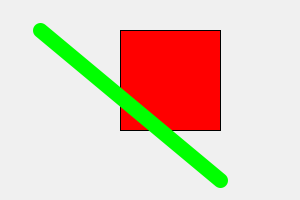

In [4]:
%%py5draw 300 200

# make the background light gray
py5.background(240)

# draw a red square
py5.fill(255, 0, 0)
py5.rect_mode(py5.CENTER)
py5.rect(170, 80, 100, 100)

# add a thick green line
py5.stroke(0, 255, 0)
py5.stroke_weight(15)
py5.line(40, 30, 220, 180)

The code can access variables and functions defined in other non-magic notebook cells. This is especially useful when the code leverages py5 functionality.

For example, the below function sets the fill color to a random color.

In [5]:
def pick_random_fill():
    py5.fill(py5.random(255), py5.random(255), py5.random(255))

The below example uses `pick_random_fill` to draw randomly colored rectangles. This example is a bit contrived, but you do see how the code below can call a function defined elsewhere.

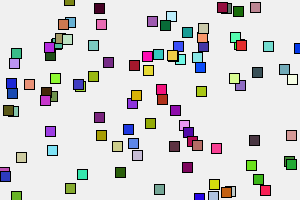

In [6]:
%%py5draw 300 200

py5.background(240)
py5.rect_mode(py5.CENTER)

for i in range(100):
    pick_random_fill()
    py5.rect(py5.random(py5.width), py5.random(py5.height), 10, 10)

The `pick_random_fill` function can be reused again elsewhere in this notebook.

By default, any new functions and variables defined in that `%%py5draw` cell are not available outside of the cell. However, you can explicitly change this. See below for further discussion.

### Saving to a File

If you like you can save the generated image to a file with the `-f` parameter, like so:

PNG file written to images/jupyter_notebooks/simple_example.png


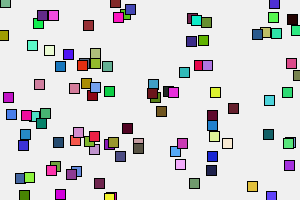

In [7]:
%%py5draw 300 200 -f images/jupyter_notebooks/simple_example.png

py5.background(240)
py5.rect_mode(py5.CENTER)

for i in range(100):
    pick_random_fill()
    py5.rect(py5.random(py5.width), py5.random(py5.height), 10, 10)

Now there's an image on my computer located at `images/jupyter_notebooks/simple_example.png`. I can embed that in this notebook using markdown.

![asdf](images/jupyter_notebooks/simple_example.png)

### OpenGL Renderers

You can also use the OpenGL renderers with the `-r` parameter, like so.

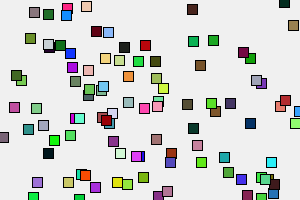

In [8]:
%%py5draw 300 200 -r P2D

py5.background(240)
py5.rect_mode(py5.CENTER)

for i in range(100):
    pick_random_fill()
    py5.rect(py5.random(py5.width), py5.random(py5.height), 10, 10)    

When that cell runs, a py5 window is quickly opened and closed. For whatever reason, the Processing's OpenGL renderers cannot draw to an invisible window (but I would be delighted to be proven wrong about that).

The previous `%%py5draw` examples in this notebook used a special `HIDDEN` renderer based on the default `JAVA2D` renderer that does not need to open a window. That `HIDDEN` renderer was created just for this purpose. Despite my best efforts, I couldn't create similar renderers based on the OpenGL renderers `P2D` and `P3D`.

The 3D renderer also works:

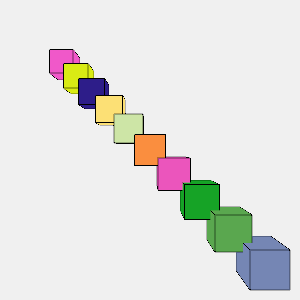

In [9]:
%%py5draw 300 300 -r P3D

py5.background(240)

N = 10

for i in range(N):
    py5.push_matrix()
    pick_random_fill()
    py5.translate(i * py5.width / N, i * py5.width / N, i * 20 - 200)
    py5.box(40)
    py5.pop_matrix()

### SVG Renderer

To create SVG images, use the `%%py5drawsvg` magic.

As before, the result can be saved to a file with the `-f` parameter.

SVG drawing written to /tmp/test.svg


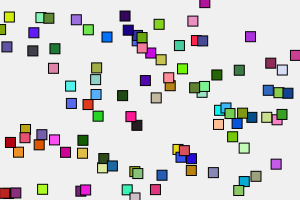

In [10]:
%%py5drawsvg 300 200 -f /tmp/test.svg

py5.background(240)
py5.rect_mode(py5.CENTER)

for i in range(100):
    pick_random_fill()
    py5.rect(py5.random(py5.width), py5.random(py5.height), 10, 10)

### PDF Renderer

Write to PDF files using `%%py5drawpdf`. Since Jupyter notebook does not support embedded PDF files, writing the output to a file is not optional.

In [11]:
%%py5drawpdf 300 200 /tmp/simple_example.pdf

py5.background(240)
py5.rect_mode(py5.CENTER)

for i in range(100):
    pick_random_fill()
    py5.rect(py5.random(py5.width), py5.random(py5.height), 10, 10)

PDF written to /tmp/simple_example.pdf


### DXF Renderer

Write 3D objects to DXF files with `%%py5drawdxf`. This probably won't be a popular choice, but maybe somebody will appreciate it.

In [12]:
%%py5drawdxf 200 200 /tmp/test.dxf

py5.translate(py5.width / 2, py5.height / 2)
py5.rotate_x(0.4)
py5.rotate_y(0.8)
py5.box(80)

DXF written to /tmp/test.dxf


In [13]:
!head /tmp/test.dxf

0
SECTION
2
ENTITIES
0
3DFACE
8
0
10
-56.562515


### Variable Scope

By default, new variables defined inside cell magics such as `%%py5draw` cannot be accessed elsewhere in the notebook.

Consider the below example. It creates new variables `random_x` and `random_y` to store the location of the square.

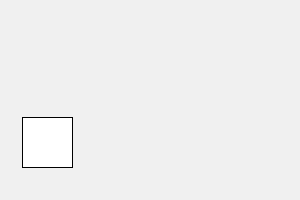

In [14]:
%%py5draw 300 200

py5.background(240)
py5.rect_mode(py5.CENTER)

random_x = py5.random(py5.width)
random_y = py5.random(py5.height)
py5.rect(random_x, random_y, 50, 50)

The variables `random_x` and `random_y` are not accessible outside of that cell:

In [15]:
random_x, random_y

NameError: name 'random_x' is not defined

This behavior is by design.

Consider that the py5 library is using the Processing library to create these graphics. Builtin Processing objects such as PImage or PGraphics are designed to be associated with one and only one Processing Sketch. Py5 can let users write code to that subverts these assumptions, and as a result use Processing in a way that is completely different from how it was designed to be used. Sometimes this can be beneficial, but other times it will cause unexpected errors.

If you understand the risks, or if you are working with non-Processing objects (as is the case for `random_x` and `random_y` in the above example), you can use the `--unsafe` parameter. This lets the cell magic add new variables and functions to the notebook namespace. As the name implies, you can cause problems for yourself by using this.

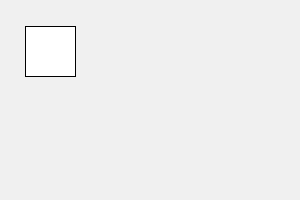

In [18]:
%%py5draw 300 200 --unsafe

py5.background(240)
py5.rect_mode(py5.CENTER)

random_x = py5.random(py5.width)
random_y = py5.random(py5.height)
py5.rect(random_x, random_y, 50, 50)

In [19]:
random_x, random_y

(50.156882768420004, 51.335178010391914)

## Animated Sketches

Of course, there's more to py5 than static Sketches. The py5 magics will support animated Sketches as well.

Note that starting your development process with static Sketches is a great way to write py5 code. For example, you can quickly develop functions for parts of your creation and test them out with static Sketches, and later use those same functions in your final animation.

Let's create a simple example. The below `setup` function will tell py5 to create a 500 by 400 Sketch window. It will set the background color and set the rect mode.

In [20]:
def setup():
    py5.size(500, 400, py5.P2D)
    py5.background(240)
    py5.rect_mode(py5.CENTER)

And finally, the `draw` function to draw random squares.

In [21]:
def draw():
    pick_random_fill()
    random_x = py5.random(py5.width)
    random_y = py5.random(py5.height)
    py5.rect(random_x, random_y, 10, 10)

To run the Sketch, use the [run_sketch()](/reference/sketch_run_sketch) method. It will pull out the `setup` and `draw` functions from the notebook's namespace and put them together in a Sketch.

In [22]:
py5.run_sketch()
print('the sketch is running!')

the sketch is running!


If you are runnning this notebook locally, you will see a new window open for the running Sketch. If you are running this through Binder, or possibly using the documentation website's Live Code feature (see the rocket ship icon at the top of the page), the Sketch is running on a server somewhere in the cloud. In that case, to see the Sketch you will need to create a Sketch portal using [py5tools.sketch_portal()](/reference/py5tools_sketch_portal). This will create what is effectively a view into what is being displayed on that Sketch window running in the cloud. To be clear, although you will see a live animation in the Sketch Portal, the Sketch is not actually running in your browser. It’s kind of like when you watch a live television program on your TV. The live events are taking place somewhere else, but images of the events are being broadcast to your television.

In [ ]:
py5_tools.sketch_portal()

By default, the [run_sketch()](/reference/sketch_run_sketch) method returns right away, as illustrated by the `print` statement. This enables the notebook user to continue coding, including executing code that interacts with the Sketch. The Sketch continues to run in its own window.

### Screenshots

The Sketch window cannot be embedded into the notebook, but the [`py5_tools.screenshot()`](/reference/py5tools_screenshot) function can grab a single snapshot of the window.

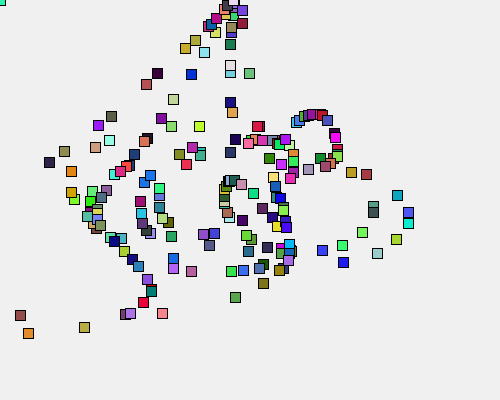

In [23]:
time.sleep(3)

sketch_snapshot = py5_tools.screenshot()

sketch_snapshot

Observe that this function returns a frame of the Sketch as a [PIL Image object](https://pillow.readthedocs.io/en/stable/index.html).

In [24]:
print(type(sketch_snapshot))

<class 'PIL.PngImagePlugin.PngImageFile'>


The [`py5_tools.save_frames()`](/reference/py5tools_save_frames) function will save multiple frames to a directory.

Of course you can also call [`save_frame()`](/reference/sketch_save_frame) from the `draw` method, but that would require you to redefine the `draw` method with a few extra lines of code. This is more convenient.

In [25]:
frames = py5_tools.save_frames('/tmp/testframes/', start=0, limit=10)

saving frame 10/10


['/tmp/testframes/frame_0000.png',
 '/tmp/testframes/frame_0001.png',
 '/tmp/testframes/frame_0002.png',
 '/tmp/testframes/frame_0003.png',
 '/tmp/testframes/frame_0004.png',
 '/tmp/testframes/frame_0005.png',
 '/tmp/testframes/frame_0006.png',
 '/tmp/testframes/frame_0007.png',
 '/tmp/testframes/frame_0008.png',
 '/tmp/testframes/frame_0009.png']

In [ ]:
frames

Those frames can be assembled into a video file.

The [`py5_tools.capture_frames()`](/reference/py5tools_capture_frames) function is similar to [`py5_tools.save_frames()`](/reference/py5tools_save_frames) except it returns the frames as a `list` of [PIL Image object](https://pillow.readthedocs.io/en/stable/index.html)s.

In [26]:
frames = py5_tools.capture_frames(10, period=1)

collecting frame 10/10


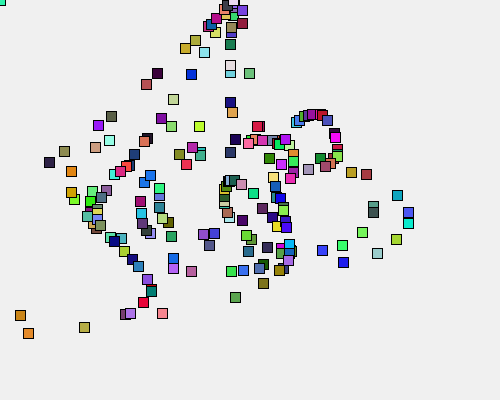

In [27]:
frames[0]

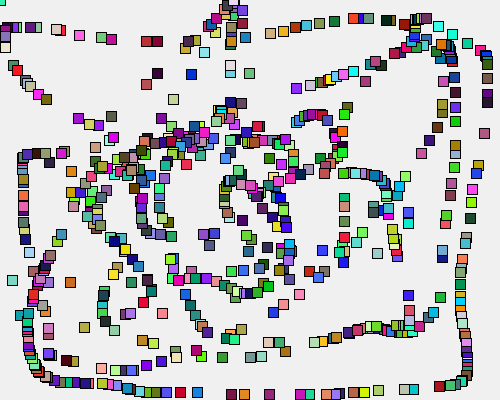

In [28]:
frames[-1]

### Animated GIFs

The last magic creates animated GIFs from your Sketch. Everybody loves animated GIFs.

In [29]:
py5_tools.animated_gif('images/jupyter_notebooks/simple_example.gif', 10, 1, 0.5)

collecting frame 10/10


'images/jupyter_notebooks/simple_example.gif'

The animated GIF can then be embedded in a notebook markdown cell.

![simple_example](images/jupyter_notebooks/simple_example.gif)

### Print Statements

Question: if the user's `draw` method contains `print` statements, where does the output appear?

This would be a simple question if the [run_sketch()](/reference/sketch_run_sketch) method did not return right away (which you could achieve by passing the parameter `block=False`). The print statements would always go into the output of the cell with the call to that method. When the Sketch exits, the output for that cell would be complete.

By default, the [run_sketch()](/reference/sketch_run_sketch) method does return right away when called from a Jupyter notebook. The print statements will still go to the output of the cell with the call to that method, but when you move on to the next cell, the print statements will start to appear there instead. Why? This has to do with the inner workings of Jupyter notebooks. It gets weirder if you delete the cell that is currently receiving the output. If that happens, the print output will disappear completely.

This is less than perfect, and might frustrate users who like to debug their code with print statements. Instead, use the [println()](/reference/sketch_println) method. It will route all print statements to the output of the cell that made the call to [run_sketch()](/reference/sketch_run_sketch). The functionality of [println()](/reference/sketch_println) can be customized with [set_println_stream()](/reference/sketch_set_println_stream).

If instead you want to send messages to the Jupyter notebook log, you can always do so like this:

In [30]:
shell = get_ipython()
shell.log.critical('test message')

In the terminal I used to run `jupyter notebook`, I see this message:

```
[IPKernelApp] CRITICAL | test message
```

This is a more reliable debugging technique.